In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from elm import ELM
import seaborn as sns

In [2]:
data = pd.read_csv("phishing.csv")
data.shape

(11054, 32)

## Data cleaning

In [3]:
# check for null values
data.isnull().sum()

# we don't have any null values

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [4]:
# There are no duplicates
data = data.drop_duplicates(keep='first')
data.shape

(11054, 32)

In [5]:
# all columns are categorical, we can keep them as is
data.dtypes

Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

## Exploratory analysis

In [6]:
# Correlation with class

data.corr()['class']

# https and AnchorURL has the highest correlation, implying that https sites are more secure
# UsingPopupWindow has the least correlation

Index                  0.000802
UsingIP                0.094033
LongURL                0.057661
ShortURL              -0.067931
Symbol@                0.052994
Redirecting//         -0.038885
PrefixSuffix-          0.348588
SubDomains             0.298231
HTTPS                  0.714704
DomainRegLen          -0.225879
Favicon               -0.000231
NonStdPort             0.036461
HTTPSDomainURL        -0.040096
RequestURL             0.253478
AnchorURL              0.692895
LinksInScriptTags      0.248415
ServerFormHandler      0.221380
InfoEmail              0.018039
AbnormalURL           -0.060751
WebsiteForwarding     -0.020151
StatusBarCust          0.041878
DisableRightClick      0.012675
UsingPopupWindow       0.000136
IframeRedirection     -0.003362
AgeofDomain            0.121402
DNSRecording           0.075579
WebsiteTraffic         0.346003
PageRank               0.104593
GoogleIndex            0.129000
LinksPointingToPage    0.032694
StatsReport            0.079632
class   

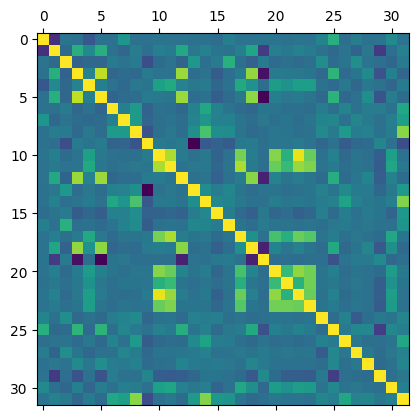

In [7]:
# Correlation matrix

plt.matshow(data.corr())
plt.show()

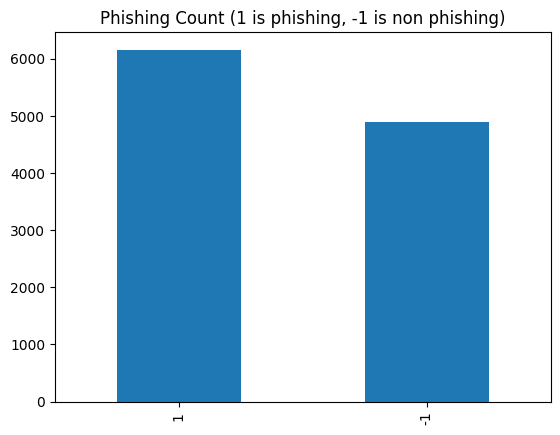

In [8]:
# Check how many entries are phishing
data['class'].value_counts().plot(kind='bar')
plt.title("Phishing Count (1 is phishing, -1 is non phishing)")
plt.show()
# Dataset is unbalanced, we have more phishing sites compared to non phishing ones

## Maching learning Model

In [9]:
# Cross validation, split the dataset 

X = data.iloc[:, :31]
y = data.iloc[:, 31]


### SVM Model

In [10]:
svm_model = svm.SVC(probability=True)

skf = StratifiedKFold(n_splits = 3)

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')
print("Accuracy:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='precision')
print("Precision Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='recall')
print("Recall Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='roc_auc_ovr_weighted')
print("ROC-AUC:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='f1_weighted')
print("F1:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

Accuracy:  0.55699 +/- 0.00011
Precision Score:  0.55699 +/- 0.00011
Recall Score:  1.00000 +/- 0.00000
ROC-AUC:  0.69400 +/- 0.17060
F1:  0.39851 +/- 0.00013


### Naive Bayes

In [11]:
nb_model = GaussianNB()

skf = StratifiedKFold(n_splits = 3)

scores = cross_val_score(nb_model, X, y, cv=skf, scoring='accuracy')
print("Accuracy Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(nb_model, X, y, cv=skf, scoring='precision')
print("Precision Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))



Accuracy Score:  0.86322 +/- 0.02082
Precision Score:  0.93881 +/- 0.00409


In [12]:
scores = cross_val_score(nb_model, X, y, cv=skf, scoring='recall')
print("Recall Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(nb_model, X, y, cv=skf, scoring='roc_auc_ovr_weighted')
print("ROC-AUC Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(nb_model, X, y, cv=skf, scoring='f1_weighted')
print("F1 Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

Recall Score:  0.80688 +/- 0.03668
ROC-AUC Score:  0.95695 +/- 0.00526
F1 Score:  0.86353 +/- 0.02090


### Extreme Learning Machines (ELM)

In [13]:
elm_model = ELM(hid_num=30)

skf = StratifiedKFold(n_splits = 4)

scores = cross_val_score(elm_model, X, y, cv=skf, scoring='accuracy')
print("Accuracy Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(elm_model, X, y, cv=skf, scoring='precision')
print("Precision Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))



Accuracy Score:  0.55699 +/- 0.00013
Precision Score:  0.56582 +/- 0.01517


In [14]:
scores = cross_val_score(elm_model, X, y, cv=skf, scoring='recall')
print("Recall Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

# ROC AUC is not supported for ELM
# scores = cross_val_score(elm_model, X, y, cv=skf, scoring='roc_auc_ovr_weighted')
# print("ROC-AUC Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

scores = cross_val_score(elm_model, X, y, cv=skf, scoring='f1_weighted')
print("F1 Score:  %0.5f +/- %0.5f" % (scores.mean(), scores.std()))

Recall Score:  1.00000 +/- 0.00000
F1 Score:  0.43435 +/- 0.06208


### Summary

As we can see in the above models, we used stratified k fold for cross validation and used the cross_val_score to train and provide scoring such as accuracy, precision, recall, f1_weighted. ROC curve was not supported for ELM so we skipped and used the other metrics to compute the performance of the model.

We initially tried to used the ELM module from python, but we faced issues so switched to https://github.com/masaponto/Python-ELM.

Out of all the models, Navie bayes had the highest accuracy. ELM and SVM both performed the same at 55% which was not very performative. But they had the highest Recall scores meaning that they were good at identifying true positives. SVM model took significantly longer than the ELM model to train and evaluate. Thus ELM model provided better recall with lower time to train. This would be helpful in real time scenarios where we have to retrain the model with live data.